In [113]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기(4절~6절)</font></b>

# 4. copy 및 view
## 4.1.할당(assignment)

In [2]:
import numpy as np

In [3]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
b = a

In [5]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 2414634710384, numpy.ndarray)

In [6]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 2414634710384, numpy.ndarray)

In [7]:
a is b # 동일 객체

True

In [8]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [10]:
np.all(a==b)

True

In [11]:
b.shape = (3,4) # 할당받은 b의 shape를 수정

In [12]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 2414634710384, numpy.ndarray)

In [13]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 2414634710384, numpy.ndarray)

## 4.2.얕은 복사 : 뷰(view : 데이터의 틀) -> copy=False

In [17]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
a.reshape(2, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
c = a.view() # 얕은 복사(데이터의 틀만 복사하고 데이터 자체는 동일. 데이터를 바꾸면 a와 c 모두 바뀜)

In [20]:
print(id(a), id(c))

2414669352080 2414669365136


In [21]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [23]:
c.shape = (2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
c[1, ::2] = [9,9,9] # 9 : 1행의 짝수번째 열 변경 
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3.깊은 복사

In [36]:
a = np.array([[5, 4, 13, 0],
            [99, 6, 16, 1],
            [20, 5, 14, 0]]) # 맨 오른쪽은 타겟변수(종속변수), 왼쪽 3개는 독립변수
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [37]:
# X = a[:, :-1] # 슬라이싱이 될 때 뷰가 반환됨(얕은 복사)
X # 독립변수가 복수면 대문자로 변수명 씀
X = a[:, :-1].copy() # 깊은 복사
X = np.array(a[:, :-1], copy=True)
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [38]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [39]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5. 고급 인덱싱
## 5.1.인덱스 배열로 인덱싱

In [21]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [23]:
a[[0,5,9]] # 인덱스 자리에 리스트 삽입

array([ 0, 25, 81])

In [24]:
# 인덱싱하기 위한 값을 배열로 만들기
i = np.array([0,1,1,9])
a[i] # 결과는 i(인덱싱 배열)의 형태를 따라간다

array([ 0,  1,  1, 81])

In [25]:
i = np.array([[0,1],
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [26]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [27]:
a[i] += 10 #1번 인덱스는 한 번만 10 증가

In [29]:
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [32]:
# 색상                R G B
palette = np.array([[0,0,0], # black
                    [255,0,0], # red
                    [0,255,0], # green
                    [0,0,225], # blue
                    [255,255,255]]) # white

In [34]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 225],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [35]:
image_data.shape

(10, 10, 3)

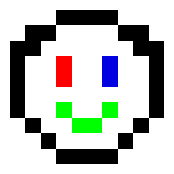

In [39]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2.논리 배열을 이용한 인덱싱

In [48]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [49]:
a%2==0 # 논리 배열

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [51]:
a[a%2==0] # boolean indexing : 논리 배열을 이용한 인덱싱 시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [52]:
a[a>15]

array([16, 17, 18, 19])

# 6. 선형대수
- 2차원 numpy 배열은 행렬
    * 행렬의 곱 : @
    * 단위행렬 : np.eye(n) : n행 n열의 단위행렬이 만들어짐
    * a의 역행렬 @ a = 단위행렬
    * 전치행렬 : X.T, X.transpose() x행 y열 ->> y행 x열
    * 역행렬 : np.linalg.inv(X)

In [53]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [54]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [55]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [56]:
# 정방행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])
# np.linalg.inv(a) Error
a.T @ a 

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [57]:
# 전치행렬을 곱하면 정방형렬이 아니었던 것이 정방행렬이 된다
a @ a.T

array([[ 6, 12],
       [12, 26]])

## 6.1.선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2

In [33]:
import numpy as np
x = np.array([2,4]) # 공부량 : 독립변수
y = np.array([40,60]) # 점수 : 종속변수(타겟변수)
X = np.c_[x, np.ones(len(x))]
X = np.column_stack((x, np.ones(len(x))))
X = np.dstack((x, np.ones(len(x)))).reshape(-1,2) # dstack은 3차원이 되기 때문에 2차원으로 변환
Y = y.reshape(-1, 1)
X, Y

(array([[2., 1.],
        [4., 1.]]),
 array([[40],
        [60]]))

In [34]:
# X @ wb = Y
# (X의 역행렬 @ X ==> 단위행렬) @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([[10.],
       [20.]])

In [35]:
np.linalg.solve(X, Y)

array([[10.],
       [20.]])

In [36]:
x_ = np.linspace(0, 10, 100) # 0부터 10까지 100개 데이터
h = wb[0]*x_ + wb[1]
h = np.add(np.multiply(wb[0], x_), wb[1])

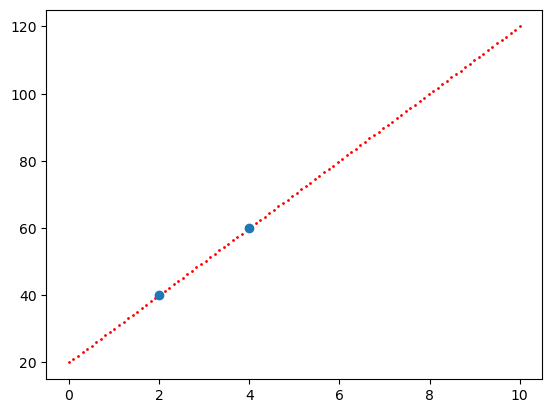

In [37]:
import matplotlib.pyplot as plt
plt.scatter(x_, h, c='r', s=1)
plt.scatter(x, y)
plt.show()

## 6.2.선형연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터n개

In [38]:
x = np.array([32,64,96,118,126,144,152.5,158]) # x에는 주로 독립변수를 넣음
y = np.array([18,24,61.5,49,52,105,130.3,125]) # y에는 주로 타겟변수를 넣음

In [39]:
X = np.c_[x, np.ones(len(x))]
Y = y.reshape(-1,1)
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [40]:
# X @ wb = Y
# X.T @ X @ wb = X.T @ Y
# X.T @ X : 전치행렬을 이용하여 X를 정방행렬로 만들기
# # ((X.T @ X)의 역행렬 @ X.T @ X ==> 단위행렬) @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
# wb = (X.T @ X)의 역행렬 @ X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [41]:
np.linalg.solve(X.T @ X, X.T @ Y)

array([[  0.87493126],
       [-26.79078617]])

In [42]:
print('독립변수 x :', x)
print('실제값 y :', y)
h = wb[0]*x + wb[1]
print('예측값 h :', h)

독립변수 x : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
실제값 y : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 h : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


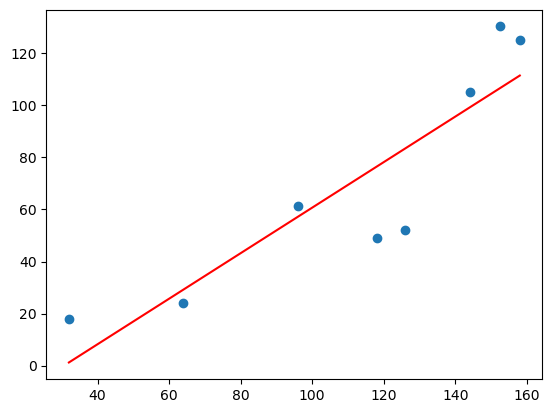

In [43]:
plt.plot(x, h, c='r') # 선 그래프
plt.scatter(x, y)
plt.show()

# 7. 연습문제 (실습형)

In [44]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data # 독립변수 4개, 데이터 개수는 150개
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
np.mean(iris_data, axis=0)
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [61]:
# 2. 처음 다섯 개 행을 출력하세요
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [84]:
# 3. 처음 다섯 개 행에서 마지막 열을 제외한 나머지 열을 출력하세요  
iris_data[0:5,0:-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [85]:
# 4. 처음 다섯 개 행에서 마지막 열만 출력하세요
iris_data[0:5, -1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [89]:
# 5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번의 결과와 같아야 합니다.
ar1 = iris_data[0:5,0:-1]
ar2 = iris_data[0:5, -1]
answer1 = np.c_[ar1, ar2]
answer2 = np.column_stack((ar1, ar2))
answer3 = np.hstack((ar1, ar2[:, np.newaxis]))
answer4 = np.hstack( (ar1, ar2.reshape(-1,1)))
answer5 = np.hstack( (ar1, np.expand_dims(ar2, axis=1)))
answer6 = np.concatenate( (ar1, ar2.reshape(-1, 1)), axis=1)
answer1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [91]:
answers = [answer1, answer2, answer3, answer4, answer5, answer6]
all([np.all(answer1==answer) for answer in answers]) # all 함수는 리스트, np.all은 배열을 받음

True

In [92]:
def same_all(*answers):
    if len(answers)>0:
        first = answers[0]
        return all([np.all(first==answer) for answer in answers])
    else:
        return False
same_all(answer1, answer2, answer3, answer4, answer5, answer6)    

True

In [93]:
same_all(*answers)

True

In [79]:
# 6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요
iris_sample = iris_data[:5]
print('데이터 :\n',iris_sample)
col_avg = np.mean(iris_sample, axis=0)
col_avg = iris_sample.mean(axis=0)
print('iris_sample의 열별 평균 :', col_avg)

데이터 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris_sample의 열별 평균 : [4.86 3.28 1.4  0.2 ]


In [67]:
iris_sample > col_avg

array([[ True,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [68]:
iris_sample[iris_sample>col_avg]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [94]:
x = iris_sample.copy() # 깊은 복사
x[x<=col_avg] = np.nan # 출력을 안 했으면 하는 부분에 결측치
x

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

In [98]:
np.where(iris_sample>col_avg, iris_sample, np.nan)

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

# 8. 연습문제 (문제풀이형)

In [99]:
# 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0)) -> 3번
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [100]:
print(a.sum(0), a.sum(axis=0)) # 열을 고정하고, 행들끼리 합 (열별합)

[12 15 18 21] [12 15 18 21]


In [101]:
# 2. a 데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요. -> 3번
#       나머지는 차원이 바뀐 값을 return하여 출력될 뿐 a가 바뀌지 않는다
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

array([[3., 6., 2., 5.],
       [2., 8., 9., 4.],
       [9., 6., 4., 0.]])

In [102]:
a.shape

(3, 4)

In [103]:
print(a.ravel()) # (1) 차원 배열로 평평하게 펴주는 ravel() flatten() a가 바뀌지 않음
a

[3. 6. 2. 5. 2. 8. 9. 4. 9. 6. 4. 0.]


array([[3., 6., 2., 5.],
       [2., 8., 9., 4.],
       [9., 6., 4., 0.]])

In [104]:
print(a.reshape(6,2))
a # (2) 바뀐차원을 return할 뿐 a가 바뀌지 않음

[[3. 6.]
 [2. 5.]
 [2. 8.]
 [9. 4.]
 [9. 6.]
 [4. 0.]]


array([[3., 6., 2., 5.],
       [2., 8., 9., 4.],
       [9., 6., 4., 0.]])

In [105]:
a.resize((2,6))
a

array([[3., 6., 2., 5., 2., 8.],
       [9., 4., 9., 6., 4., 0.]])

In [106]:
print(a.T)
a

[[3. 9.]
 [6. 4.]
 [2. 9.]
 [5. 6.]
 [2. 4.]
 [8. 0.]]


array([[3., 6., 2., 5., 2., 8.],
       [9., 4., 9., 6., 4., 0.]])

In [107]:
# 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다. 빈칸에 들어갈 내용으로 옳은 것을 고르세요. -> 1번
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
a[:2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [108]:
# 4. 다음 코드의 실행 결과는? -> 2번
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [112]:
# 5. 다음 두 배열 a, b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은? -> 2번
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
answer1 = np.c_[a,b]
answer2 = np.column_stack((a,b))
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack((a,b), axis=1)
answer5 = np.stack((a,b), axis=-1)

In [111]:
print(answer1)

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]


In [115]:
same_all(answer1, answer2, answer3, answer4, answer5)

True